In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
The code to build the dataset is as follows:
The standard deviation of banana was 8.0.
Using the normal distribution data with 4 as the center value and 0.6 as the standard deviation, the banana width characteristics were constructed,
Compared with banana, apple length width ratio is balanced.
The normal distribution data with 6 as the center value and 0.6 as the standard deviation were used to construct the apple length characteristics,
The normal distribution data with 6 as the center value and 0.6 as the standard deviation were used to construct the apple width characteristics,
Three pandas datasets are generated, which are bananas, apples and fruits containing bananas and apples. Each dataset contains 1000 bananas and apples. Each dataset contains a class. Banana classification is represented by the number 0 and apple is represented by the number 1.
'''
np.random.seed(121)
std = 0.6
N = 1000
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N) ,
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N , dtype=int)    
})

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width' : np.random.normal(6, std, N),
    'class' : np.ones(N, dtype=int)
})

fruits = pd.concat([bananas, apples])


Text(0, 0.5, 'width')

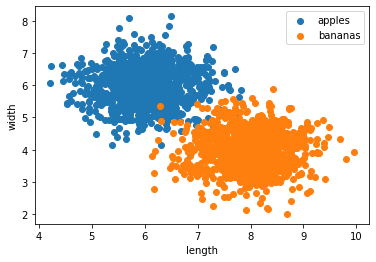

In [3]:
'''
Data distribution map
Scatter plot
The data distribution of the two kinds of fruits was observed by mapping the length and width features to the scatter plot. (the transmission gate is not involved in the code comment part. For the assignment of data sets of data frame class, this method of parameter transmission is recommended to increase the readability.)

'''

plt.scatter(x= 'length', y= 'width', data= apples, label = 'apples')
plt.scatter(x= 'length', y= 'width', data= bananas, label = 'bananas')
plt.legend()
plt.xlabel('length')
plt.ylabel('width')


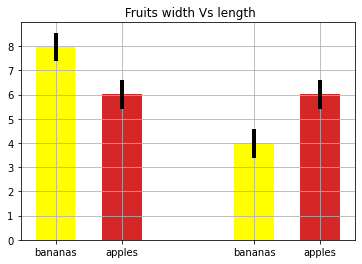

In [86]:
label = ['bananas', 'apples', 'bananas', 'apples']

x_axis = [1, 1.5, 2.5, 3]

height_bar = [fruits.loc[fruits['class']==0, 'length'].mean(),
             fruits.loc[fruits['class']==1, 'length'].mean(),
             fruits.loc[fruits['class']==0, 'width'].mean(),
             fruits.loc[fruits['class']==1, 'width'].mean()]

yerr_bar = [fruits.loc[fruits['class']==0, 'length'].std(),
            fruits.loc[fruits['class']==1, 'length'].std(),
            fruits.loc[fruits['class']==0, 'width'].std(),
            fruits.loc[fruits['class']==1, 'width'].std()]

color_bar = ['yellow', 'tab:red', 'yellow', 'tab:red']
plt.bar( x=x_axis,
    height=height_bar,
    yerr = yerr_bar,
    color= color_bar,
    error_kw= {'lw': 4},
    width= 0.3
    )
plt.xticks(ticks= x_axis, labels=label )
plt.title(' Fruits width Vs length')
plt.grid()


Text(0.5, 1.0, 'Length Distribution ')

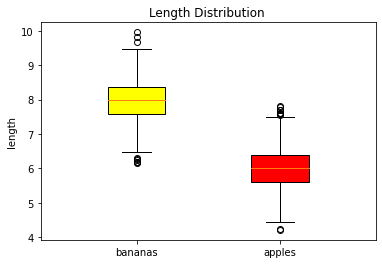

In [84]:
plt.boxplot(x= 'length', data= fruits.loc[fruits['class']== 0], positions= [0], labels= ['bananas'] ,
patch_artist=True, # use facecolor when this option is true
boxprops= {'facecolor': 'yellow'}, widths=0.12)
plt.boxplot(x= 'length', data= fruits.loc[fruits['class']== 1], positions= [0.3], labels= ['apples'], 
patch_artist= True, 
boxprops={ 'facecolor':'r'}, widths=0.12 )
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

Text(0.5, 0, 'Width')

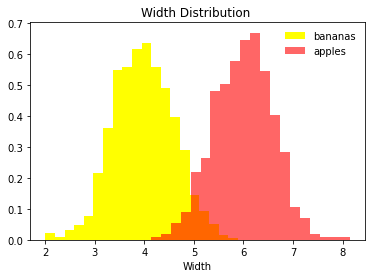

In [93]:
fea= 'width'
plt.hist(x= fea, data= fruits.loc[fruits['class']== 0], bins= 20, label= 'bananas', color= 'yellow', density= True)
plt.hist(x= fea, data= fruits.loc[fruits['class']== 1], bins= 20, label= 'apples', color= 'red', density= True, alpha = 0.6)
plt.legend(frameon = False)
plt.title('Width Distribution ')
plt.xlabel('Width')

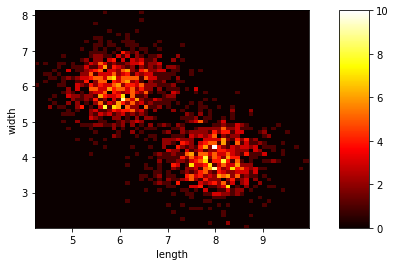

In [98]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=60, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

Text(0.5, 0, 'L/W ratio')

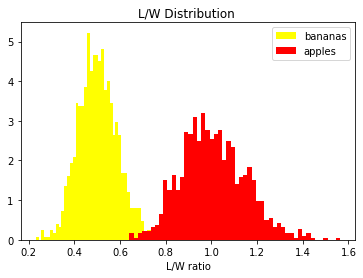

In [107]:
fea = 'w/L'
fruits[fea]  = fruits['width']/ fruits['length']

plt.hist(x= fea, data= fruits.loc[fruits['class']== 0],  bins= 50, density= True, color= 'yellow', label= 'bananas')

plt.hist(x= fea, data= fruits.loc[fruits['class']== 1], bins= 50, density= True, color= 'red', label= 'apples')

plt.legend()
plt.title('W/L Distribution ')
plt.xlabel('W/L ratio')

Text(0.5, 0, 'Area')

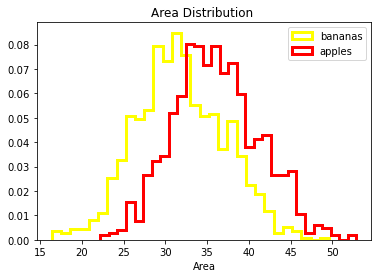

In [112]:
fea = 'area'
fruits[fea] = fruits['width'] * fruits['length']
plt.hist(x= fea, data = fruits.loc[fruits['class']== 0] , bins= 30, density= True,
color='yellow', label='bananas', histtype='step', lw= 3)
plt.hist(x= fea, data = fruits.loc[fruits['class']== 1] , bins= 30, density= True, 
color='red', label='apples', histtype='step', lw= 3)
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')


Text(0.5, 0, 'Circumference')

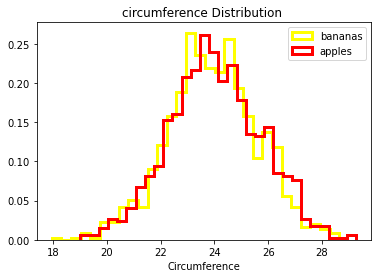

In [114]:
fea = 'area'
fruits[fea] = 2 * (fruits['width'] + fruits['length'])
plt.hist(x= fea, data = fruits.loc[fruits['class']== 0] , bins= 30, density= True,
color='yellow', label='bananas', histtype='step', lw= 3)
plt.hist(x= fea, data = fruits.loc[fruits['class']== 1] , bins= 30, density= True, 
color='red', label='apples', histtype='step', lw= 3)
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')

In [115]:
from scipy import stats
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=82.438425661083, pvalue=0.0)

In [116]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-18.33979554877528, pvalue=1.4737736564093967e-69)

In [117]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096)